# Logistic Regession and Image classification

In [1]:
# importin importent libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1-Loading gigits dataset from sklearn library

In [5]:
from sklearn.datasets import load_digits
digits = load_digits()


#### 2-Number of Rows and Cloumns in dataset

In [3]:
# input variables 
digits.data.shape

(1797, 64)

#### 3-Output lables

In [3]:
digits.target.shape

(1797,)

#### 4-Ploting 1st 10 images from dataset

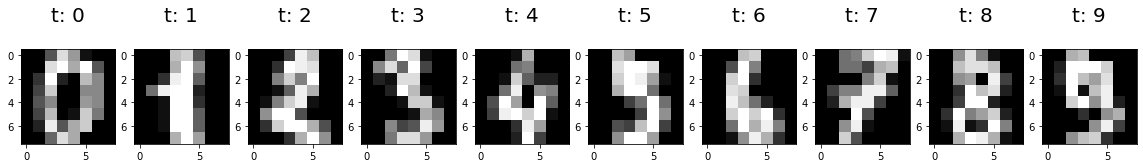

In [5]:
plt.figure(figsize=(20,4))
for index, (image, lable) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1, 10, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('t: %i\n' % lable , fontsize=20)

In [ ]:
# pyplot manual
help(plt)

#### 5-Start training the model

In [7]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target 
X_train , X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 6-Splited data no.of rows and columns

In [8]:
print('Train input data: ' , X_train.shape)
print('Test input data: ' , X_test.shape)
print('Train output data: ' , y_train.shape)
print('Test output data: ' , y_test.shape)

Train input data:  (1437, 64)
Test input data:  (360, 64)
Train output data:  (1437,)
Test output data:  (360,)


#### 7-Creating and fitting the model

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X_train,y_train)
model

c:\Users\C Collection\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### 8-Model predictions

In [10]:
model.predict(X_test[0:5])

array([2, 8, 2, 6, 6])

#### 9-Accuracy score of the model

In [11]:
score = model.score(X_test,y_test)
score


0.9666666666666667

#### 10- Confusion matrics to define the performance of a classification algorithm

In [12]:
# confussion matrics
from sklearn import metrics
predicts = model.predict(X_test)
cm = metrics.confusion_matrix(y_test,predicts) 
cm

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  0,  0,  3],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 38,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 36,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 40]], dtype=int64)

#### 11-Confusion matricsin for of a heatmap

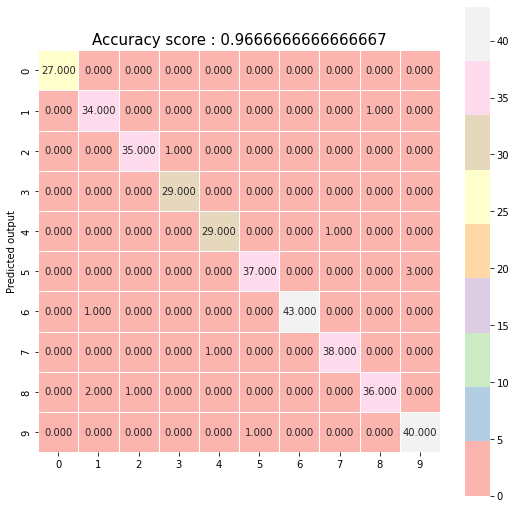

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True,cmap="Pastel1");
plt.ylabel("Actual output")
plt.ylabel("Predicted output")
all_sample_title= "Accuracy score : {0}".format(score)
plt.title(all_sample_title, size=15);

#### 12-Getting the misclassified images’ index

In [42]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predicts):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1
print(misclassifiedIndexes)  

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


#### 13-Showing the misclassified images and image labels using matplotlib

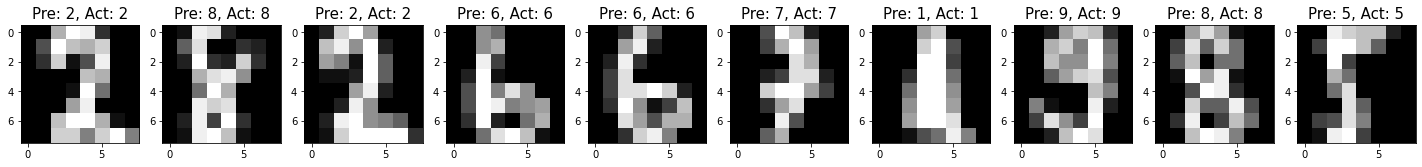

In [40]:
plt.figure(figsize=(25,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
 plt.subplot(1, 10, plotIndex + 1)
 plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)
 plt.title("Pre: {}, Act: {}".format(predicts[badIndex], y_test[badIndex]), fontsize = 15)